In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go

In [3]:
# Reading the data from csv file and parsing the date to making it as index
#The input to Prophet is always a dataframe with two columns: ds and y. 
#The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date The y column must be numeric
# Forecasting Confirmed cases in India

df_base=pd.read_csv('data/processed/Deaths_processed.csv',parse_dates=[0])  
df_Ind=df_base[['date','India']]
df_Ind.sort_values('date',ascending=True)
df=df_Ind.rename(columns={'date': 'ds','India': 'y'}) #The input to Prophet is always a dataframe with two columns: ds and y. 

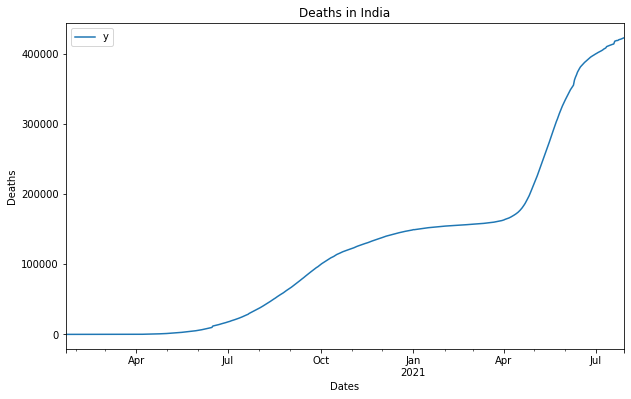

In [5]:
df.set_index('ds').plot(title='Deaths in India',figsize=(10, 6),xlabel='Dates',
                                 fontsize=10,ylabel='Deaths',)
plt.show()

In [6]:
from fbprophet import Prophet 

In [26]:
# Forecasting Growth using logistic model
# We must specify the carrying capacity in a column cap
# training data set
m_log = Prophet(growth='logistic')   
df['cap']=423217 # population 
m_log.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
#test data set
future_log = m_log.make_future_dataframe(periods=10, freq='D')
future_log['cap']=423217 # population 
future_log.tail()

,ds,cap
560,2021-08-04,423217
561,2021-08-05,423217
562,2021-08-06,423217
563,2021-08-07,423217
564,2021-08-08,423217


In [28]:
# Forecasting Growth using logistic model
forecast_log = m_log.predict(future_log)

In [29]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast_log['ds'], 
                         y=forecast_log['yhat'],
                         mode='lines+markers',
                         name='Prediction',
                         line=dict(color='blue', width=3)
                        ))
fig.add_trace(go.Scatter(x=df['ds'], 
                         y=df['y'],
                         mode='lines+markers',
                         name='Actual',
                         line=dict(color='Green', width=3)
                        ))
fig.update_layout(
    title='India COVID-19 - Deaths prediction using FBProphet Logistic model',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.show()

In [16]:
# Forecasting growth using linear model
m_linear=Prophet()  
m_linear.fit(df)
future_linear = m_linear.make_future_dataframe(periods=10)
future_linear.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
560,2021-08-04
561,2021-08-05
562,2021-08-06
563,2021-08-07
564,2021-08-08


In [17]:
forecast_linear = m_linear.predict(future_linear)
forecast_linear[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
560,2021-08-04,479764.839835,468285.623008,490600.135060
561,2021-08-05,482341.829100,471478.646076,493214.730902
562,2021-08-06,485431.126166,474566.251901,496172.470304
563,2021-08-07,487955.805229,476744.321911,499586.171179
564,2021-08-08,490451.822917,478442.549741,500916.633297


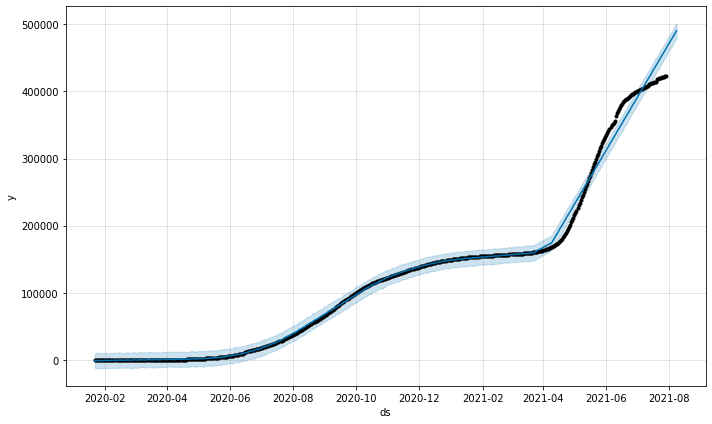

In [18]:
 fig_confirmed=m_linear.plot(forecast_linear)

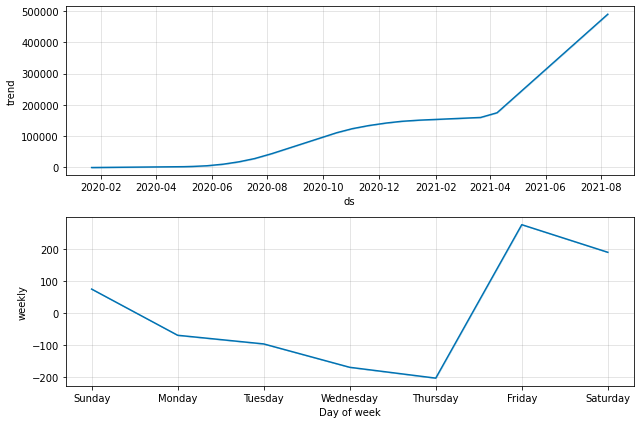

In [19]:
fig_trend=m_linear.plot_components(forecast_linear)

In [20]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=forecast_linear['ds'], 
                         y=forecast_linear['yhat'],
                         mode='lines+markers',
                         name='Prediction',
                         line=dict(color='blue', width=3)
                        ))
fig.add_trace(go.Scatter(x=df['ds'], 
                         y=df['y'],
                         mode='lines+markers',
                         name='Actual',
                         line=dict(color='Green', width=3)
                        ))
fig.update_layout(
    title='India COVID-19 - Deaths prediction using FBProphet linear model',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.show()